## 수박시장
### 1. Data Import

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
data = pd.read_excel('data.xlsx', index_col = 0)

In [3]:
data

,log.q,log.h,log.p,log.pc,log.pv,log.w,log.n,log.y_n,log.pf
Year,,,,,,,,,
1930,1.932,1.902,2.068,0.976,0.367,1.462,2.090,2.781,1.101
1931,1.892,1.882,2.004,0.753,1.184,1.362,2.093,2.712,1.106
1932,1.826,1.761,1.897,0.814,1.124,1.230,2.096,2.591,1.129
1933,1.751,1.741,1.968,1.007,0.993,1.204,2.099,2.561,1.149
1934,1.779,1.778,2.017,1.092,0.641,1.267,2.102,2.614,1.140
1935,1.822,1.805,1.982,1.045,0.822,1.290,2.104,2.662,1.177
1936,1.796,1.793,2.107,1.092,0.824,1.301,2.108,2.713,1.174
1937,1.851,1.835,2.025,0.925,0.903,1.352,2.110,2.741,1.175
1938,1.850,1.825,2.037,0.934,1.322,1.342,2.113,2.704,1.196


**변수 설명**
- **log q** : 수박의 재배량
- **log h** : 수박의 수확량
- **log p** : 수박의 평균 가격
- **log p_c** : 연간 면화 가격
- **log p_v** : 야채 평균 가격
- **log w** : 인건비
- **log n** : 미국의 인구
- **log (y/n)** : 개인당 소득
- **log p_f** : 수박의 배송비용

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1930 to 1951
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   log.q    22 non-null     float64
 1   log.h    22 non-null     float64
 2   log.p    22 non-null     float64
 3   log.pc   22 non-null     float64
 4   log.pv   21 non-null     float64
 5   log.w    21 non-null     float64
 6   log.n    22 non-null     float64
 7   log.y_n  22 non-null     float64
 8   log.pf   22 non-null     float64
dtypes: float64(9)
memory usage: 1.7 KB


### 2. Data Cleaning

#### 2.1 Missing Value 처리

In [5]:
df = data.dropna()

NaN값은 dropna() method를 이용하여 처리하였다. 장점으로는 편리하게 missing value를 제거할 수 있고, 편향되지 않게 삭제가 가능하다는 점이 있으며, 단점으로는 모든 데이터의 관측치가 적어진다는 점이 있다.

#### 2.2 다중공선성

**상관관계**

In [6]:
import seaborn as sns

<AxesSubplot:>

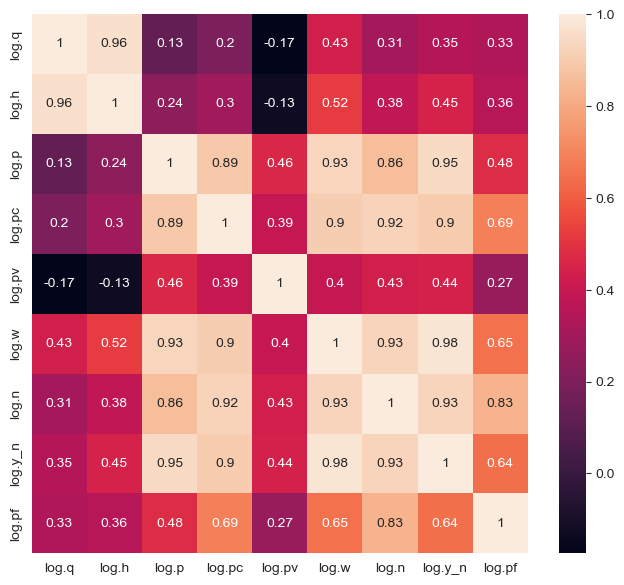

In [7]:
plt.figure(figsize = (8,7))
sns.heatmap(df.corr(), annot = True)

- 재배량과 수확량 간 상관계수가 높게 나왔으나, 의사 결정 시점이 다르므로 변수로 사용해도 문제가 없다.

**Variation Inflation Factor**

$$VIF_i = \frac{1}{1 - r_i}$$
<br>
<center>$r_i = i$번째 변수를 제외한 회귀식의 $R^2$값

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(9) :
    print(df.columns[i], ':', variance_inflation_factor(df,i))

log.q : 25548.374551168723
log.h : 18354.228777923017
log.p : 5876.730999043998
log.pc : 221.815876841143
log.pv : 17.354091847228695
log.w : 3732.2824473595865
log.n : 18725.343687844008
log.y_n : 9260.9459436666
log.pf : 1627.3011519663164


VIF값이 모두 10을 넘어감으로, 단순 산술적으로 본다면 모든 변수에 다중공선성이 존재한다

### 3. 공급곡선 추정
#### 3.1 Stationary

In [9]:
import statsmodels.tsa.stattools as tsa
for i in range(9) :
    print(tsa.adfuller(df.iloc[:,i])[1])

0.1058971490183
0.9990316112595997
0.8447530102201162
0.9946567475717213
0.7177188043197864
0.8323807863752186
1.0
0.16207256909259382
0.8792762567613562


<center> $H_0$ : The Series has a Unit Root </center>

<b>Dicky-Fuller test</b> 진행결과 p-value가 모두 유의수준 0.05를 크게 넘는다. 따라서 위 시계열 데이터는 안정적이지 않다

#### 3.2 회귀식 유도
**3.2.1 공급함수와 역공급함수**

시장 분석을 위해 공급과 수요 모형에 있는 네 가지 핵심 가정을 알아두어야 한다.

- 한 시장의 공급과 수요에 국한하여 초점을 맞춰야 한다
- 시장에서 구매하고 판매하는 모든 재화는 통일하다
    - 상품이 동질적이라는 가정이 있어야 한다. 즉, 시장에서 소비자들은 다른 종류의 재화를 기본적으로 교환가능한 것으로 간주한다
- 시장의 재화는 모두 같은 가격에 판매되며, 모든 사람은 가격이나 판매되는 재화의 질 등에 대해 정보의 비대칭성이 없어야 한다
- 시장에 다수의 생산자와 소비자가 있다 즉, 어떤 한 사람의 선택이 다른 사람에 의해 영향을 끼치지 않을 정도로 많은 참여자가 있어야 한다.

다만, 공급곡선을 추정하기 위해 모든 사람의 추상적인 공급은 추정할 수 없으므로, 균형 거래량과 균형 가격만 주어진 데이터를 이용해 공급곡선을 추정할 때에는 공급함수보다 역공급함수를 추정하는 것이 가격에 따른 시장참여자의 최소요구금액을 추정할 수 있으므로 이해가 쉽다.

반면, 역공급함수의 추정은 자칫하면 공급자의 공급용의가 시장에 의해 시장균형가격을 형성한다는 공급이론에 반대되는 결과로 해석될 수 있다는 점에서 단점이 있다.

In [10]:
import statsmodels.api as sm
X = df.iloc[:,2]
X = sm.add_constant(X)
y = df.iloc[:,0]
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.q   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.3078
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.586
Time:                        17:22:55   Log-Likelihood:                 28.701
No. Observations:                  21   AIC:                            -53.40
Df Residuals:                      19   BIC:                            -51.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7730      0.122     14.571      0.000       1.518       2.028
log.p          0.0298      0.054      0.555      0.586      -0.083       0.142
==============================================================================
Omnibus:                        4.228   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.493
Skew:                          -0.814   Prob(JB):                        0.288
Kurtosis:                       3.445   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

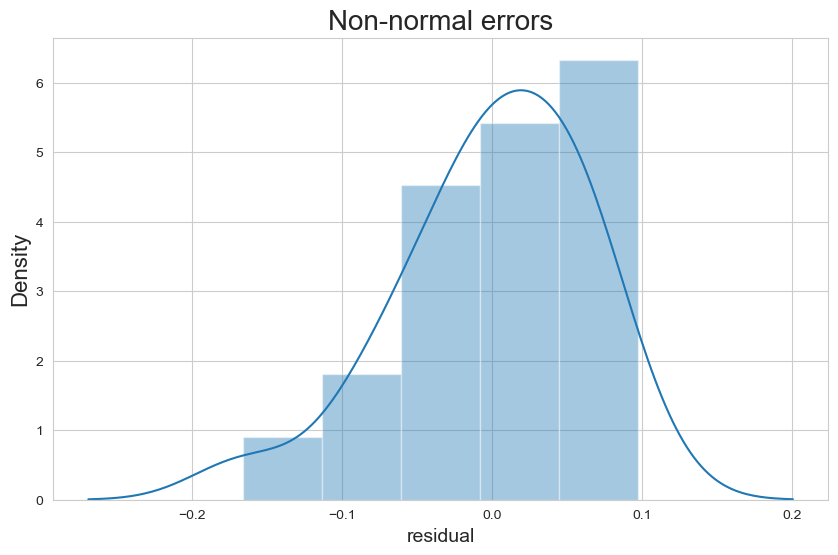

In [11]:
plt.figure(figsize = (10,6))
sns.distplot(model.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

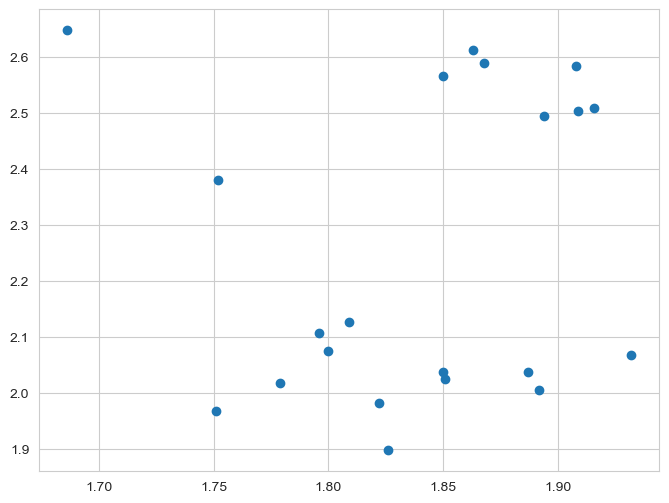

In [12]:
plt.figure(figsize = (8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,2])

**3.2.2 Variable Selection**

수박의 공급에 영향을 끼치는 요인은 무엇일까?
- 가격적 측면 : 수박 자체의 가격
- 대체재의 존재 
    - 수박을 경작하지 않았을 때, 농경지에 수박 대신 면화와 다른 야채를 재배할 수 있다
- 비용적 측면
    - 운송비용과 인건비용은 충분히 영향을 끼치지 않을까?

In [13]:
df.columns

Index(['log.q', 'log.h', 'log.p', 'log.pc', 'log.pv', 'log.w', 'log.n',
       'log.y_n', 'log.pf'],
      dtype='object')

In [14]:
df_ = df.iloc[:,[0,2,3,4,5,8]]

In [15]:
for i in range(6) :
    print(df_.columns[i], ':', variance_inflation_factor(df,i))

log.q : 25548.374551168723
log.p : 18354.228777923017
log.pc : 5876.730999043998
log.pv : 221.815876841143
log.w : 17.354091847228695
log.pf : 3732.2824473595865


VIF 값이 확연히 변하였는데, 이는 Covariance Matrix 내에서 변수간의 공분산이 달라졌기 때문에 이와 같이 변한 것으로 생각된다

**3.2.3 Period Selection**

- **합리적 기대 모형**에 따르면 생산자는 이용 가능한 모든 정보를 이용해 미래의 가격에 대한 기대를 형성하게 되므로, 당해년도 가격이 내년도에도 이어질 것이라고 기대하기 때문에 당해년도의 1년전의 가격은 당해년도 재배량에 영향을 미친다


- **적응적 기대 모형**에 따르면 생산자는 과거의 사건들을 미루어 봤을 때 그 결과들을 종합하며 내년도 작물의 재배량을 결정한다


- 생산자는 재배 시점에 당해년도 작물의 가격을 기초하여 재배량을 결정하기 때문에, **Rational Expectations**모형에 근거하여 1기전 가격이 당해년도 Quantity에 영향을 미친다고 추정하는 것이 좋다고 생각한다


- 1기전 가격이 영향을 미치는 변수는 수박의 가격, 야채의 가격, 면화의 가격, 인건비용이다

In [16]:
df_.loc[:,'lagged_log.p'] = df_.loc[:, 'log.p'].shift()
df_.loc[:,'lagged_log.pc'] = df_.loc[:, 'log.pc'].shift()
df_.loc[:,'lagged_log.pv'] = df_.loc[:, 'log.pv'].shift()
df_.loc[:,'lagged_log.w'] = df_.loc[:, 'log.w'].shift()

#### 3.3 Estimate Regression

$$ln q_t = \alpha_0 + \alpha_1ln  p_{t-1} + \alpha_2 ln p_{t-1}^c + \alpha_3 ln p_{t-1}^v + \alpha_4 ln w_{t-1} +  \epsilon_t$$

In [17]:
X_supply = sm.add_constant(df_.loc[:,['lagged_log.p','lagged_log.pc','lagged_log.pv','lagged_log.w']])
y = df_.loc[:,'log.q']

model = sm.OLS(y, X_supply, missing = "drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.q   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     10.00
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           0.000378
Time:                        17:22:55   Log-Likelihood:                 40.839
No. Observations:                  20   AIC:                            -71.68
Df Residuals:                      15   BIC:                            -66.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5918      0.088     18.154      0.000       1.405       1.779
lagged_log.p      0.0089      0.094      0.095      0.926      -0.192       0.210
lagged_log.pc    -0.1057      0.085     -1.247      0.232      -0.287       0.075
lagged_log.pv    -0.1070      0.027     -4.014      0.001      -0.164      -0.050
lagged_log.w      0.3083      0.100      3.085      0.008       0.095       0.521
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.402
Skew:                          -0.636   Prob(JB):                        0.496
Kurtosis:                       3.258   Cond. No.                         57.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

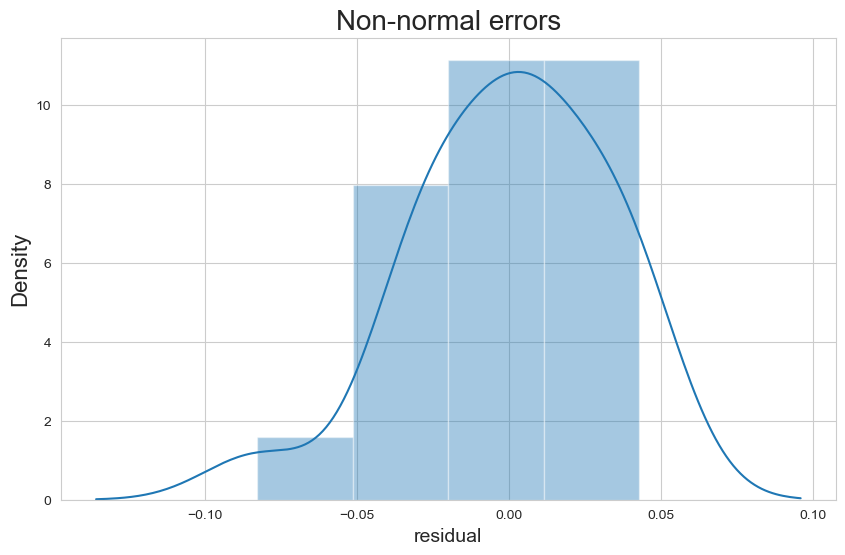

In [18]:
plt.figure(figsize = (10,6))
sns.distplot(model.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

내생성 문제가 발생할 가능성이 있기 때문에, 다음과 같은 식 두개를 2SLS방식으로 추정하도록 한다

$$ln  p_t = \gamma_0 + \gamma_1ln  p_{t-1} + \eta_t$$


$$ln  \frac{p_t}{w_t} = \gamma_0 + \gamma_1 \frac{p_{t-1}}{w_{t-1}} + \eta_t$$

최종적으로 재배량은 다음과 같이 가정한다

$$ln  q_t = \beta_0 + \beta_1 \hat {ln p_t} + \epsilon_{2t}$$

$$ln  q_t = \beta_0 + \beta_1 \hat{ln \frac{p_t}{w_t}} + \epsilon_{2t}$$

##### First Case

we assume that
$$ln  p_t = \gamma_0 + \gamma_1ln  p_{t-1} + \eta_t$$

$$ln  q_t = \beta_0 + \beta_1 \hat {ln p_t} + \epsilon_{2t}$$

In [19]:
from statsmodels.sandbox.regression.gmm import IV2SLS as sm_IV2SLS
from linearmodels.iv import IV2SLS, compare

In [20]:
y_step_one = df_.loc[:,['log.p']]
x_step_one = sm.add_constant(df_.loc[:,['lagged_log.p']])

real_price = sm.OLS(y_step_one, x_step_one, missing = 'drop').fit()
real_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.p   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           6.92e-09
Time:                        17:22:56   Log-Likelihood:                 17.140
No. Observations:                  20   AIC:                            -30.28
Df Residuals:                      18   BIC:                            -28.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1676      0.207      0.809      0.429      -0.267       0.603
lagged_log.p     0.9349      0.092     10.166      0.000       0.742       1.128
==============================================================================
Omnibus:                        5.457   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.462
Skew:                           0.989   Prob(JB):                        0.177
Kurtosis:                       3.489   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

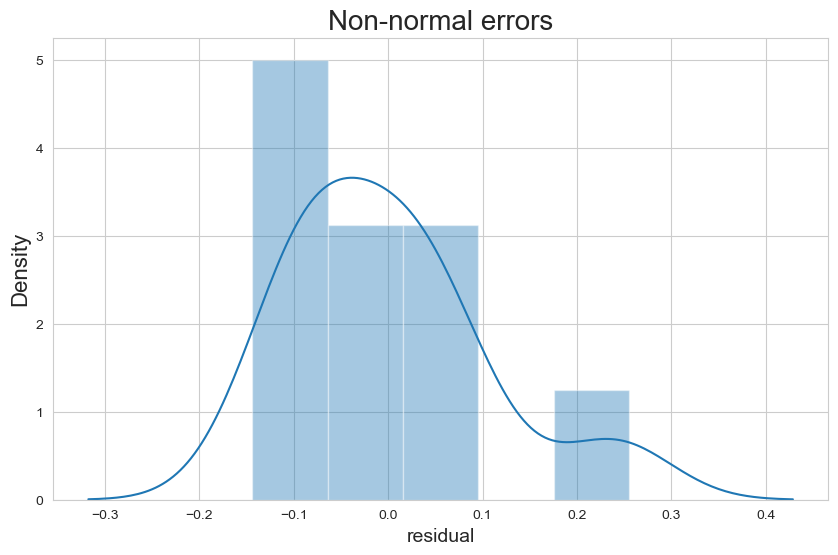

In [21]:
plt.figure(figsize = (10,6))
sns.distplot(real_price.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

In [22]:
y_step_two = df_.iloc[:,0]

real_price_fitted = pd.DataFrame(real_price.fittedvalues, 
                                 columns=['real_price_fitted'])
df_ = pd.concat([df_, real_price_fitted], axis=1, join='outer')

x_step_two = sm.add_constant(df_.real_price_fitted)

real_price_2 = sm.OLS(y_step_two, x_step_two, missing = 'drop').fit()
real_price_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.q   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     5.598
Date:                Tue, 08 Aug 2023   Prob (F-statistic):             0.0294
Time:                        17:22:56   Log-Likelihood:                 30.552
No. Observations:                  20   AIC:                            -57.10
Df Residuals:                      18   BIC:                            -55.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5667      0.114     13.711      0.000       1.327       1.807
real_price_fitted     0.1190      0.050      2.366      0.029       0.013       0.225
==============================================================================
Omnibus:                       13.222   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.851
Skew:                          -1.374   Prob(JB):                      0.00267
Kurtosis:                       5.583   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

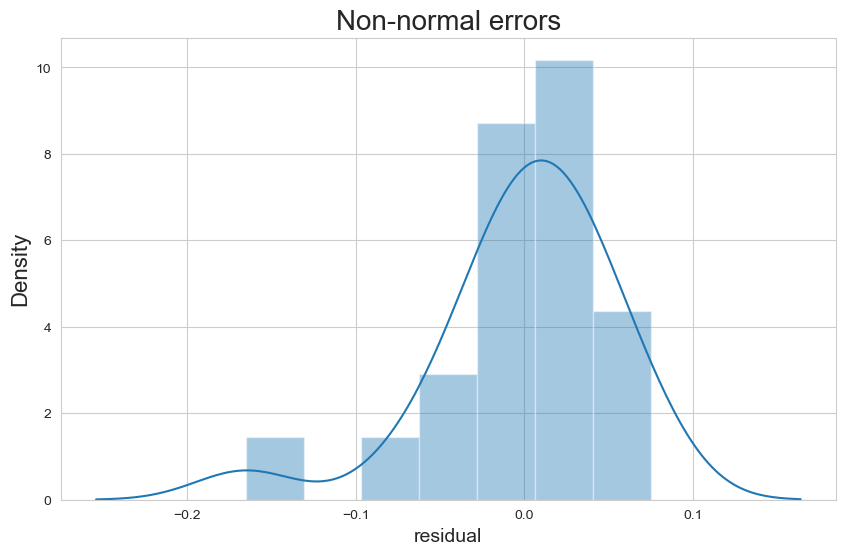

In [23]:
plt.figure(figsize = (10,6))
sns.distplot(real_price_2.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

##### Second Case

We assume that

$$ln  \frac{p_t}{w_t} = \gamma_0 + \gamma_1 \frac{p_{t-1}}{w_{t-1}} + \eta_t$$

$$ln  q_t = \beta_0 + \beta_1 \hat{ln \frac{p_t}{w_t}} + \epsilon_{2t}$$

In [24]:
y_step_one = df_.loc[:,['log.p']]
x_step_one = sm.add_constant(df_.loc[:,['lagged_log.p']])

real_price = sm.OLS(y_step_one, x_step_one, missing = 'drop').fit()
real_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.p   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           6.92e-09
Time:                        17:22:57   Log-Likelihood:                 17.140
No. Observations:                  20   AIC:                            -30.28
Df Residuals:                      18   BIC:                            -28.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1676      0.207      0.809      0.429      -0.267       0.603
lagged_log.p     0.9349      0.092     10.166      0.000       0.742       1.128
==============================================================================
Omnibus:                        5.457   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.462
Skew:                           0.989   Prob(JB):                        0.177
Kurtosis:                       3.489   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

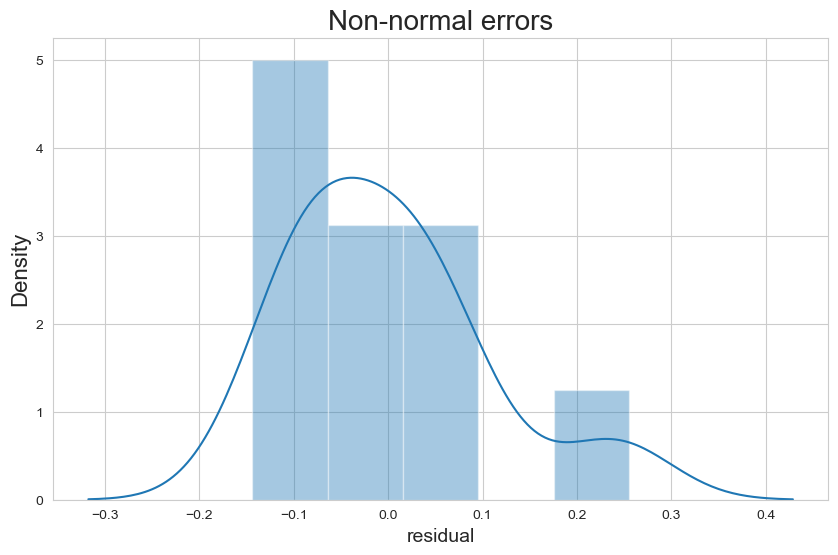

In [25]:
plt.figure(figsize = (10,6))
sns.distplot(real_price.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

In [26]:
y_step_two = df_.iloc[:,0]

price_fitted = pd.DataFrame(real_price.fittedvalues,
                            columns=['price_fitted'])
df_ = pd.concat([df_, price_fitted], axis = 1, join = 'outer')

x_step_two = sm.add_constant(df_.loc[:,['price_fitted', 'log.w']])

real_price_2 = sm.OLS(y_step_two, x_step_two, missing = 'drop').fit()
real_price_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.q   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     2.676
Date:                Tue, 08 Aug 2023   Prob (F-statistic):             0.0976
Time:                        17:22:57   Log-Likelihood:                 30.581
No. Observations:                  20   AIC:                            -55.16
Df Residuals:                      17   BIC:                            -52.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5954      0.174      9.182      0.000       1.229       1.962
price_fitted     0.0790      0.186      0.425      0.676      -0.313       0.471
log.w            0.0403      0.180      0.224      0.825      -0.339       0.420
==============================================================================
Omnibus:                       13.245   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.855
Skew:                          -1.380   Prob(JB):                      0.00267
Kurtosis:                       5.571   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

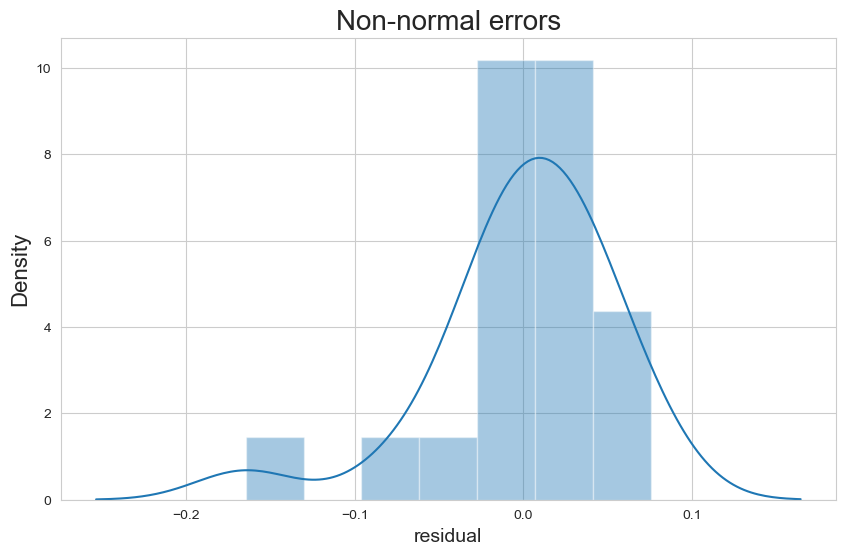

In [27]:
plt.figure(figsize = (10,6))
sns.distplot(real_price_2.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

In [28]:
df_.columns

Index(['log.q', 'log.p', 'log.pc', 'log.pv', 'log.w', 'log.pf', 'lagged_log.p',
       'lagged_log.pc', 'lagged_log.pv', 'lagged_log.w', 'real_price_fitted',
       'price_fitted'],
      dtype='object')

#### 3.4 표본기간 중 발생한 사건

- 표본 기간 중 발생한 2차 세계대전과 면화 가격 보상 프로그램을 고려하여 가변수를 새롭게 추가한 모델을 고려한다


<br>

$$ln q_t = \alpha_0 + \alpha_1ln  p_{t-1} + \alpha_2 ln p_{t-1}^c + \alpha_3 ln p_{t-1}^v + \alpha_4 ln w_{t-1} + \alpha_5 d_t^g + \alpha_6 d_t^w + \epsilon_t$$

<br>

- $d_t^g$는 1934년 이후 사전에 약속된 비율로 면화가격을 보상해주는 프로그램이 시행된 기간에 1이 되는 가변수이다


- $d_t^w$는 1939년 9월 1일부터 1945년 9월 2일까지의 제 2차 세계대전 기간이다. 미국은 1941년 12월 11일에 공식적으로 참전하였으므로 이 기간을 1로 두는 가변수로 놓는다

In [29]:
df_.loc[:, "cotton_acreage_program"] = ((df_.index >= 1934) & (df_.index <= 1950)).astype(int)
df_.loc[:, "world_war_2"] = ((df_.index >= 1943) & (df_.index <= 1946)).astype(int)

x_supply = df_.loc[:, ['lagged_log.p', 'lagged_log.pc', 'lagged_log.pv', 'lagged_log.w',
                        "cotton_acreage_program", "world_war_2"]]
X_supply = sm.add_constant(x_supply)
y = df_.iloc[:, 0]

supply = sm.OLS(y, X_supply, missing="drop").fit()

supply.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log.q   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.28e-23
Time:                        17:22:57   Log-Likelihood:                 114.27
No. Observations:                  20   AIC:                            -214.5
Df Residuals:                      13   BIC:                            -207.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.0588      0.005    228.441      0.000       1.049       1.069
lagged_log.p               0.5709      0.005    111.013      0.000       0.560       0.582
lagged_log.pc             -0.3223      0.003   -102.245      0.000      -0.329      -0.315
lagged_log.pv             -0.1236      0.001   -167.259      0.000      -0.125      -0.122
lagged_log.w               0.0087      0.004      1.977      0.070      -0.001       0.018
cotton_acreage_program     0.0324      0.001     35.024      0.000       0.030       0.034
world_war_2               -0.1548      0.001   -132.133      0.000      -0.157      -0.152
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   3.282
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.540
Skew:                           0.203   Prob(JB):                        0.763
Kurtosis:                       2.306   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

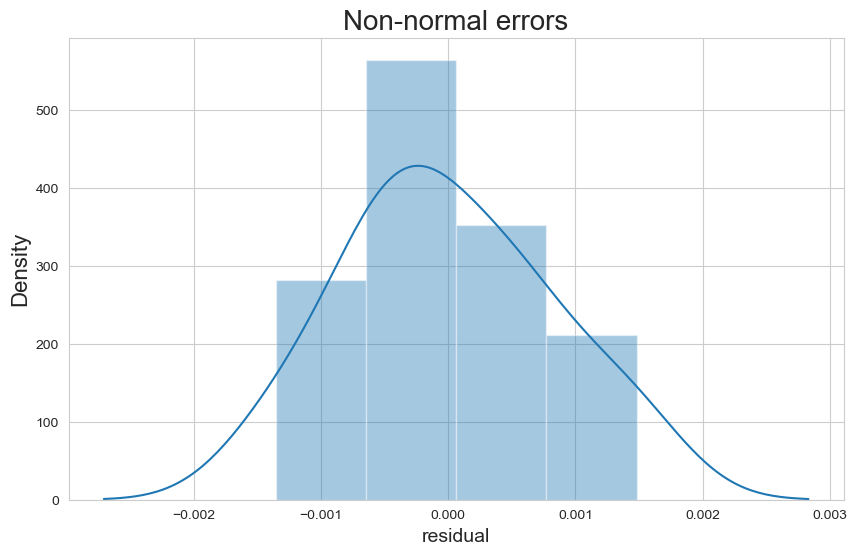

In [30]:
plt.figure(figsize = (10,6))
sns.distplot(supply.resid)
plt.title('Non-normal errors', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('residual', fontsize = 14)
plt.show()

#### Estimation of Supply Curve

In [31]:
df_.columns

Index(['log.q', 'log.p', 'log.pc', 'log.pv', 'log.w', 'log.pf', 'lagged_log.p',
       'lagged_log.pc', 'lagged_log.pv', 'lagged_log.w', 'real_price_fitted',
       'price_fitted', 'cotton_acreage_program', 'world_war_2'],
      dtype='object')

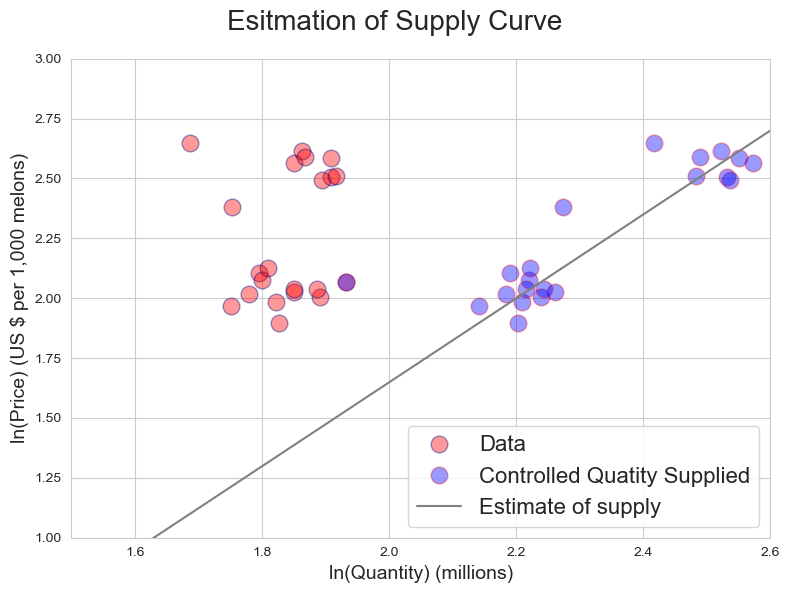

In [32]:
b_hat = supply.params.copy()
b_hat["lagged_log.p"] = 0
b_hat["const"] = 0

q_observed = df_.iloc[:,0].to_numpy().ravel()
q_supplied_controlled = q_observed - (b_hat * x_supply).sum(axis=1)

p = np.linspace(0, 7, 100)
q_hat = supply.params["const"] + supply.params["lagged_log.p"] * p

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(q_observed, df_.iloc[:,1], "or", 
        alpha = .4, markeredgecolor = "navy",
        markersize = 12, label = "Data")
ax.plot(q_supplied_controlled, df_.iloc[:,1], "ob",
        alpha = .4, markeredgecolor = "crimson",
        markersize = 12, label = "Controlled Quatity Supplied")
ax.plot(q_hat, p, "grey", label = "Estimate of supply")
ax.legend(loc = "lower right", fontsize = 16)

ax.set_xlabel("ln(Quantity) (millions)", fontsize = 14)
ax.set_ylabel("ln(Price) (US $ per 1,000 melons)", fontsize = 14)

plt.xlim([1.5,2.6])
plt.ylim([1,3])
fig.suptitle('Esitmation of Supply Curve', fontsize = 20)
fig.tight_layout()